Kaggle_Competetion!

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarning('ignore')
%matplotlib inline

In [9]:
df_train = pd.read_csv('/content/train.csv')

In [10]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

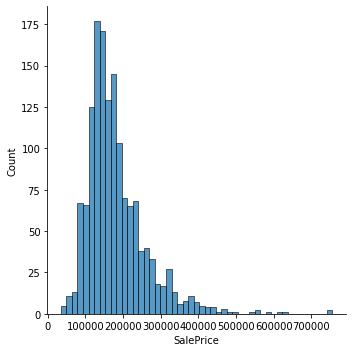

In [12]:
#Histogram
sns.displot(df_train['SalePrice']);

In [13]:
#skewness and Kurtosis (Measure of symmetry and measure wether the data is heavily tailed.)
print("Skewness:%f" % df_train['SalePrice'].skew())
print("Kurtosis:%f" % df_train['SalePrice'].kurt())

Skewness:1.882876
Kurtosis:6.536282


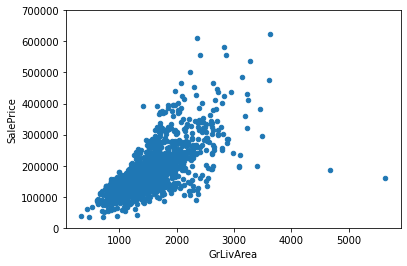

In [19]:
#Scatter Plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]],axis = 1)
data.plot.scatter(x=var,y='SalePrice',ylim = (0,700000))

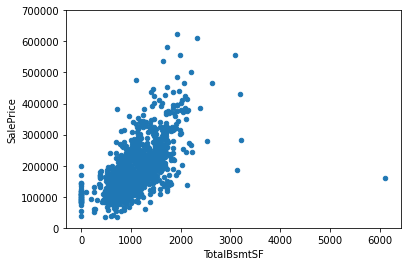

In [21]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
data.plot.scatter(x=var,y = 'SalePrice',ylim = (0,700000))

(-0.5, 9.5, 0.0, 800000.0)

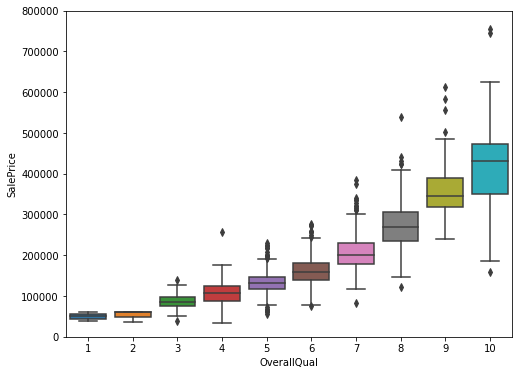

In [23]:
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis = 1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var,y="SalePrice",data=data)
fig.axis(ymin=0, ymax = 800000)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text major ticklabel objects>)

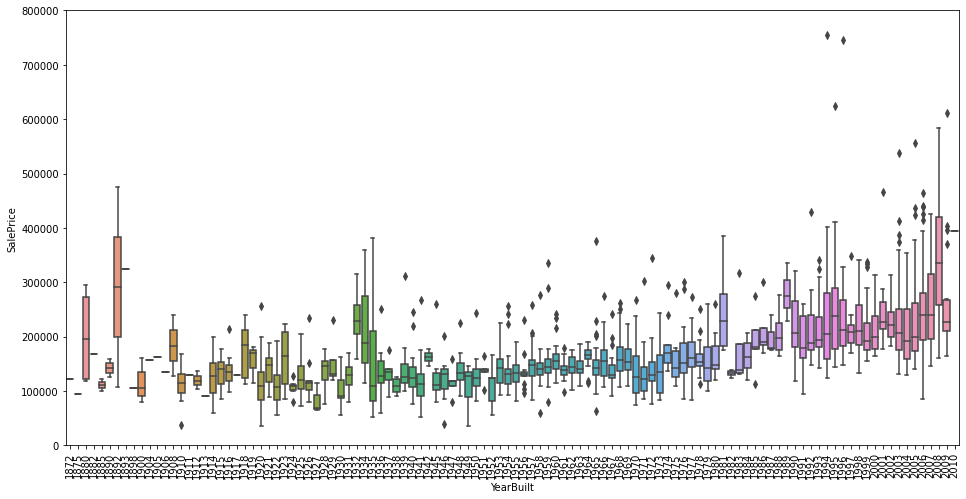

In [27]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
f, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var,y="SalePrice", data=data)
fig.axis(ymin=0,ymax=800000);
plt.xticks(rotation=90)

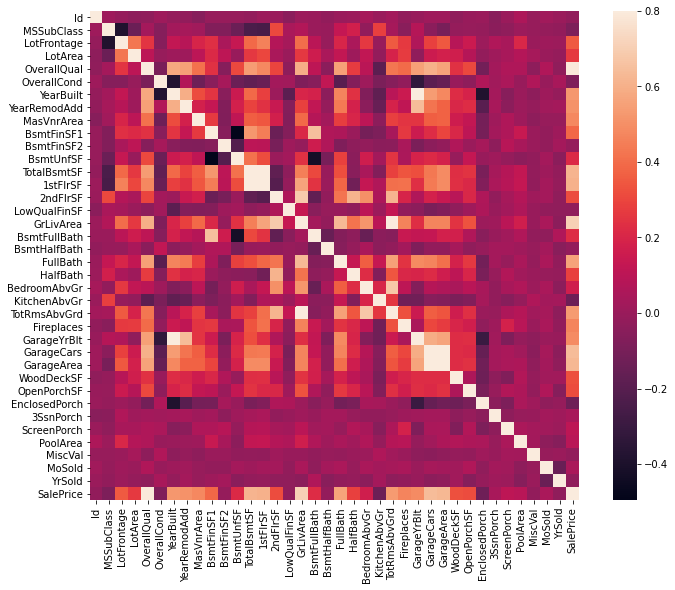

In [35]:
#Correlation Matrix (HeatMap:- Shades of same colour)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8,square= True);

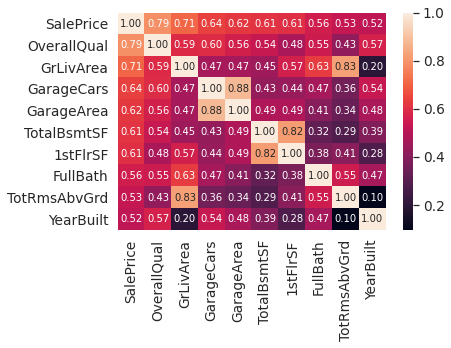

In [37]:
#SalePrice Correlation Matrix
k = 10 #Number of Variables for heatmap
cols = corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True, annot = True, fmt = '.2f', 
                 annot_kws={'size':10},yticklabels = cols.values,
                 xticklabels = cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


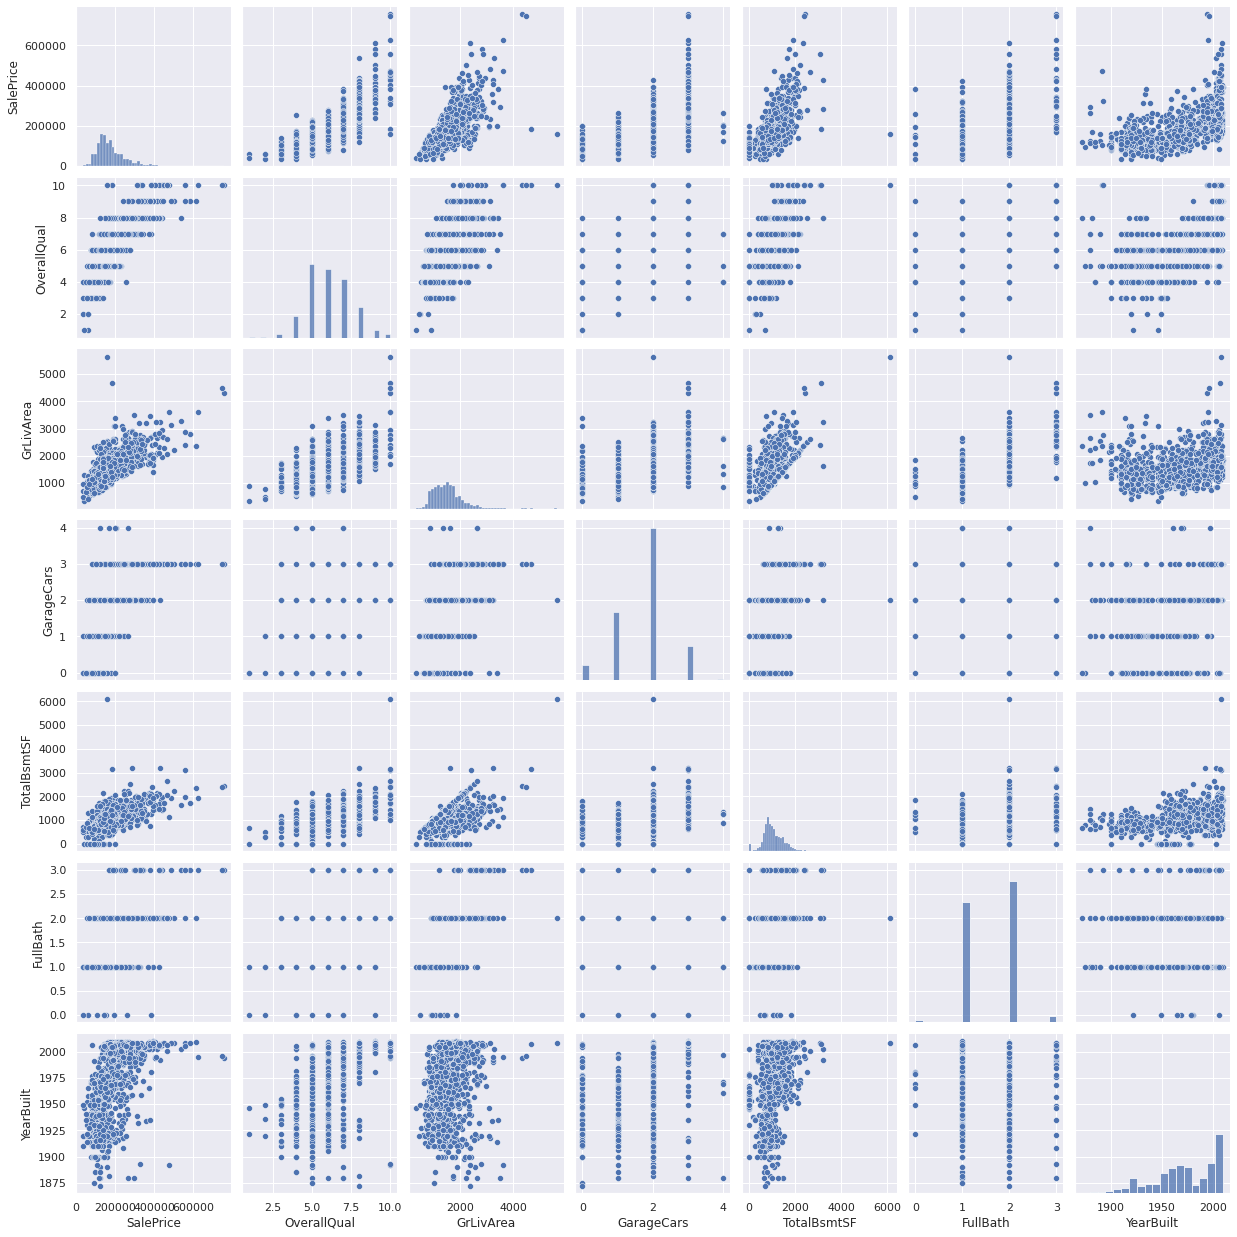

In [38]:
#Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)
#Scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show()